# PCA on speed dating data

---

In this more detailed codealong/lab we are going to practice PCA. 

Considering how often people use PCA to simplify their data, reduce noise in their data, and find unmeasured "latent variables", it is important to spend the time to understand what's going on.

---

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:

    subject_id                   :   unique individual identifier
    like_sports                  :   enjoyment of participating in sports
    like_tvsports                :   enjoyment of watching sports on tv
    like_exercise                :   enjoyment of exercise
    like_food                    :   enjoyment of food
    like_museums                 :   enjoyment of museums
    like_art                     :   enjoyment of art
    like_hiking                  :   enjoyment of hiking
    like_gaming                  :   enjoyment of pl aying games
    like_clubbing                :   enjoyment of going clubbing/partying
    like_reading                 :   enjoyment of reading
    like_tv                      :   enjoyment of tv in general
    like_theater                 :   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  :   enjoyment of movies
    like_concerts                :   enjoyment of concerts
    like_music                   :   enjoyment of music
    like_shopping                :   enjoyment of shopping
    like_yoga                    :   enjoyment of yoga
    subjective_attractiveness    :   how attractive they rate themselves
    subjective_sincerity         :   how sincere they rate themselves
    subjective_intelligence      :   how intelligent they rate themselves
    subjective_fun               :   how fun they rate themselves
    subjective_ambition          :   how ambitious they rate themselves
    objective_attractiveness     :   percieved rating others would give them on how attractive they are
    objective_sincerity          :   percieved rating others would give them on how sincere they are
    objective_intelligence       :   percieved rating others would give them on how intelligent they are
    objective_fun                :   percieved rating others would give them on how fun they are
    objective_ambition           :   percieved rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

### Load packages

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
from sklearn.decomposition import PCA

---

### Load and clean speed dating data

In [14]:
sd = pd.read_csv('/Users/tlee010/desktop/DSI-SF-2-timdavidlee/datasets/speed_dating/speed_dating_user_attributes.csv')

---

### Subset the subjective columns and visualize the variables

In [15]:
sd.head(3)
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [16]:
sd.drop([c for c in sd.columns if c.startswith('objective')],axis=1,inplace=True)
sd.dropna(inplace=True)

In [17]:
sd.shape

(542, 24)

---

### Subset and visualize some preference variables

In [ ]:
sd.columns

In [19]:
subjective = sd[[c for c in sd.columns if c.startswith('subjective')]]
subjective.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,6.0,8.0,8.0,8.0,7.0
1,7.0,5.0,8.0,10.0,3.0
2,8.0,9.0,9.0,8.0,8.0
3,7.0,8.0,7.0,9.0,8.0
4,6.0,3.0,10.0,6.0,8.0


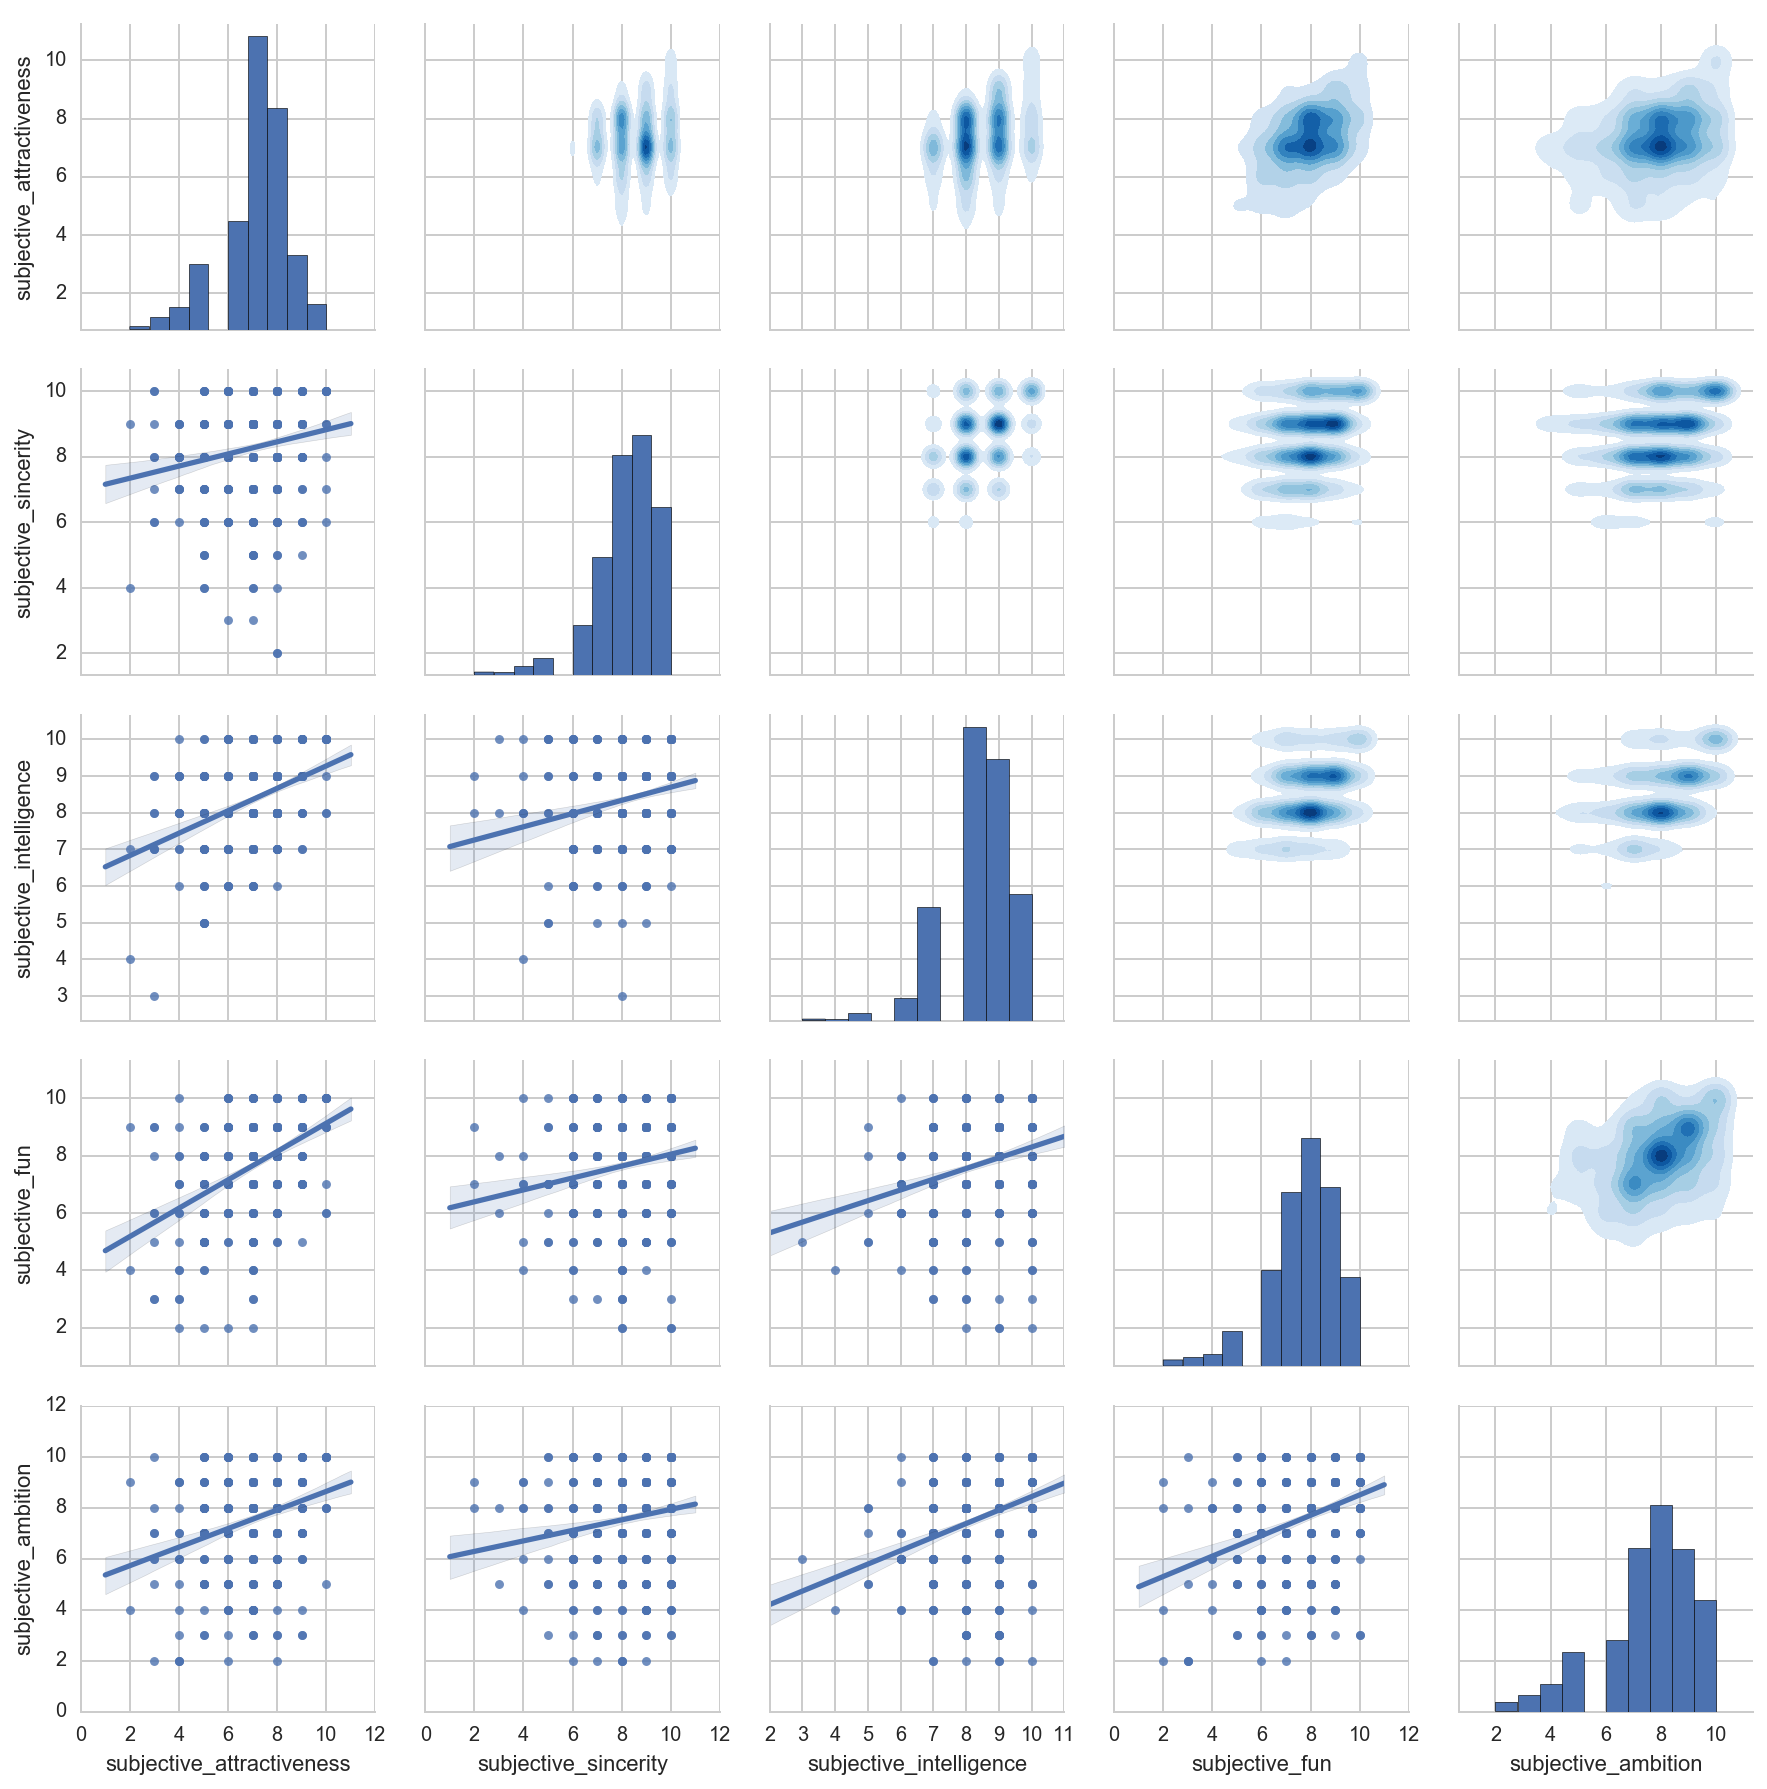

In [25]:
import seaborn as sns
grid = sns.PairGrid(subjective)
grid = grid.map_lower(sns.regplot)
grid = grid.map_diag(plt.hist)
grid = grid.map_upper(sns.kdeplot, cmap='Blues', shade=True, shade_lowest=False)

---

### Fit PCA on the subjective ratings.


,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
subjective_attractiveness,1.000000,0.182410,0.390144,0.444195,0.283712
subjective_sincerity,0.182410,1.000000,0.233328,0.189761,0.163047
subjective_intelligence,0.390144,0.233328,1.000000,0.263585,0.323155
subjective_fun,0.444195,0.189761,0.263585,1.000000,0.346745
subjective_ambition,0.283712,0.163047,0.323155,0.346745,1.000000


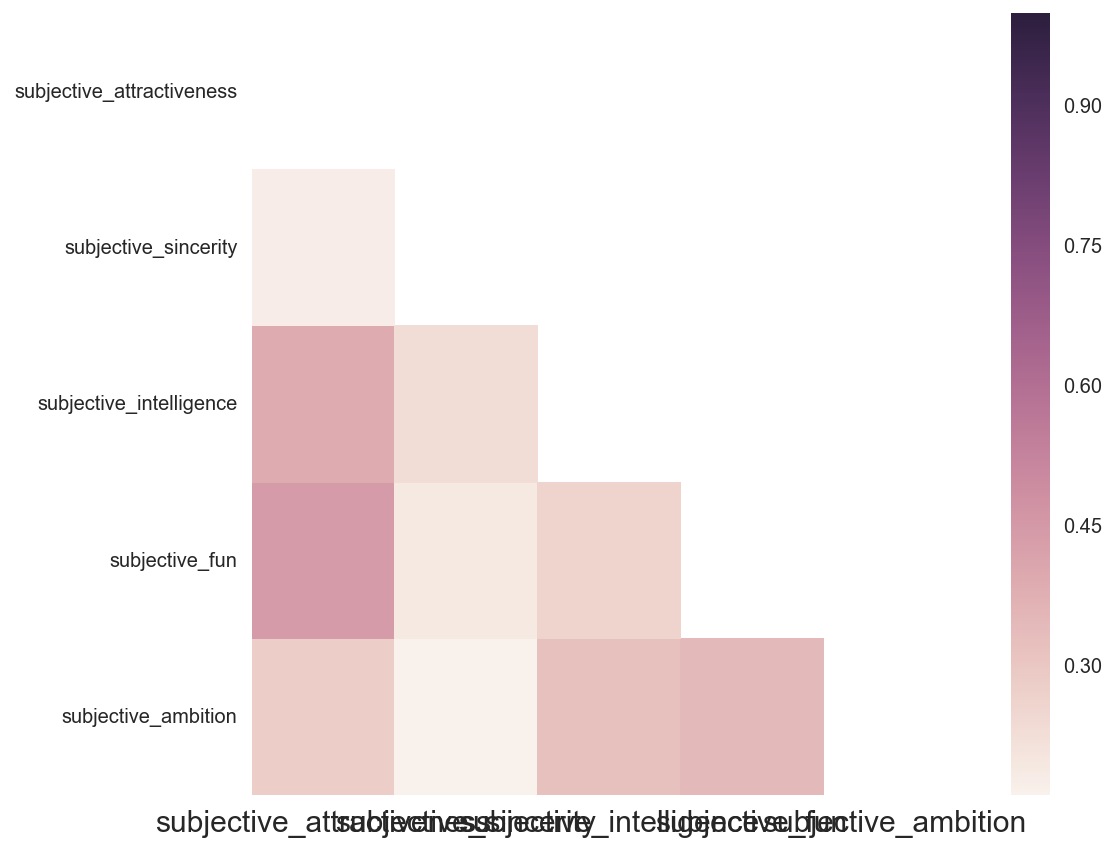

In [33]:
subj_corr = subjective.corr()
mask =np.zeros_like(subj_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(subj_corr, mask=mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize =15, rotation = 45)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize =15, rotation = 0)
subj_corr

In [34]:
sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition'],
      dtype='object')

In [35]:
like_cols = ['like_tvsports','like_sports','like_museums','like_theater','like_shopping']

In [36]:
sd_like = sd[like_cols]

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
subjective_attractiveness,1.000000,0.182410,0.390144,0.444195,0.283712
subjective_sincerity,0.182410,1.000000,0.233328,0.189761,0.163047
subjective_intelligence,0.390144,0.233328,1.000000,0.263585,0.323155
subjective_fun,0.444195,0.189761,0.263585,1.000000,0.346745
subjective_ambition,0.283712,0.163047,0.323155,0.346745,1.000000


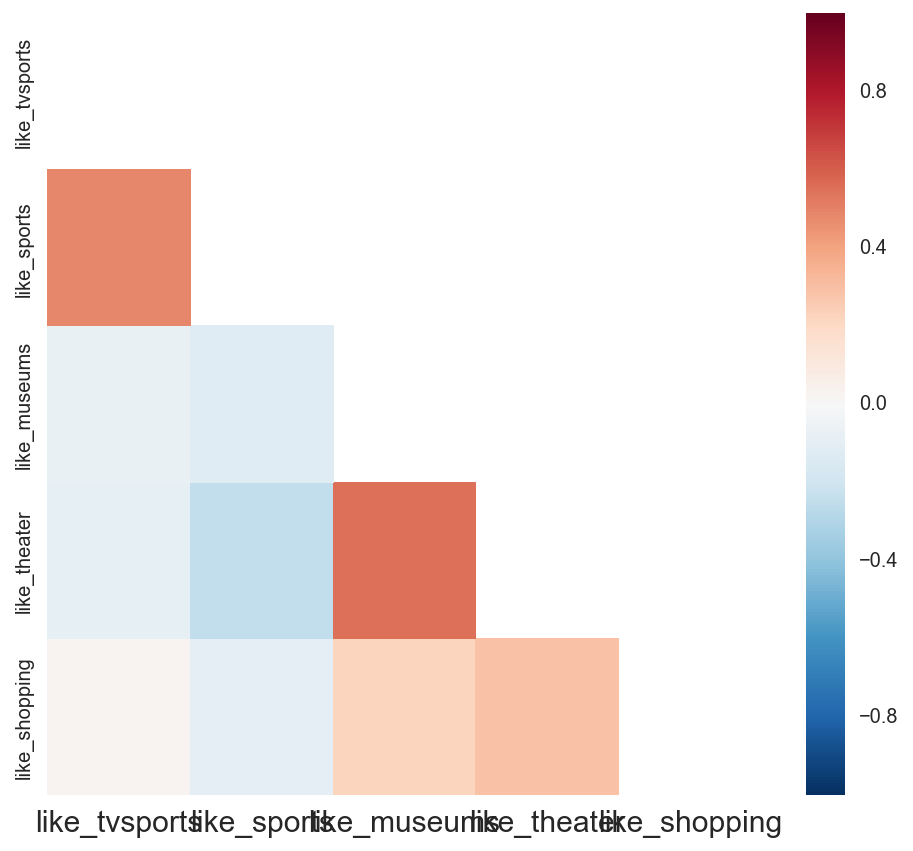

In [37]:
pref_corr = sd_like.corr()
mask =np.zeros_like(pref_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(pref_corr, mask=mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize =15, rotation = 45)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize =15, rotation = 0)
subj_corr

---

### Look at principal component weighting vectors (eigenvectors)

The principal components, or eigenvectors, can be thought of as weightings on the original variables to transform them into the new feature space.

In [38]:
from sklearn.decomposition import PCA

In [60]:
subjective_pca = PCA(n_components=5) # we have 5 columns in subjective - give max comps. = variables
subjective_pca.fit(subjective)

PCA(copy=True, n_components=5, whiten=False)

---

### Look at the eigenvalues and explained variance ratio

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [61]:
import numpy as np

subj_components = subjective_pca.components_
print subj_components

[[ 0.41595315  0.25706665  0.26877712  0.51443591  0.65116378]
 [-0.37510508 -0.4178357  -0.08813094 -0.37125492  0.73424262]
 [ 0.26913575 -0.84936147 -0.07731457  0.42483246 -0.14032421]
 [ 0.64185413 -0.14534015  0.41097346 -0.63040734 -0.02422621]
 [ 0.44929765  0.12958167 -0.86320048 -0.14010509  0.12882431]]


In [74]:
print subjective.columns.values

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print pc
    for col, weight in zip(subjective.columns.values, subj_components[i]):
        print col, weight
    print '='*60

['subjective_attractiveness' 'subjective_sincerity'
 'subjective_intelligence' 'subjective_fun' 'subjective_ambition']
PC1
subjective_attractiveness 0.415953150416
subjective_sincerity 0.257066645087
subjective_intelligence 0.268777117472
subjective_fun 0.514435910341
subjective_ambition 0.651163782714
PC2
subjective_attractiveness -0.375105077748
subjective_sincerity -0.417835695061
subjective_intelligence -0.0881309411451
subjective_fun -0.371254924398
subjective_ambition 0.734242624003
PC3
subjective_attractiveness 0.269135748349
subjective_sincerity -0.849361467537
subjective_intelligence -0.07731457481
subjective_fun 0.424832459627
subjective_ambition -0.140324211004
PC4
subjective_attractiveness 0.641854132535
subjective_sincerity -0.145340152856
subjective_intelligence 0.41097345764
subjective_fun -0.630407344954
subjective_ambition -0.0242262060299
PC5
subjective_attractiveness 0.449297650578
subjective_sincerity 0.129581670571
subjective_intelligence -0.863200481912
subjective

In [65]:
print subjective_pca.explained_variance_

[ 4.81120386  2.03299616  1.77034925  1.26223065  0.80272813]


In [66]:
print subjective_pca.explained_variance_ratio_

[ 0.450508    0.19036421  0.16577067  0.11819183  0.07516527]


---

### Transform the subjective data into principal component space

The transform function in the PCA will create you new component variable matrix.

In [72]:
subjective_n = (subjective - subjective.mean()) / subjective.std()
subjective_pcs = subjective_pca.transform(subjective_n.values)
subjective_pcs = pd.DataFrame(subjective_pcs, columns=['PC1','PC2','PC3','PC4','PC5'])

In [64]:
subjective_pcs.head(3)

,PC1,PC2,PC3,PC4,PC5
0,-0.853763,0.028201,0.186763,-0.992411,-0.311217
1,-2.784793,-2.772877,4.414945,-1.078446,-1.046172
2,1.155151,-0.493733,-0.341965,0.532705,-0.017416


---

### Compare a person's original subjective ratings to component variables

---

### Create PC1 manually

To demonstrate how the the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component PC1 manually.

#### 1. Pull out the eigenvector for PC1

In [68]:
confidence_weights = subjective_pca.components_[0]
print confidence_weights

[ 0.41595315  0.25706665  0.26877712  0.51443591  0.65116378]


#### 2. Create a dataframe showing the original values for the subjective variables for person 1

In [81]:

pc1_creation = pd.DataFrame({'personal_original':subjective_n.values[0,:]},index=subjective.columns)

#### 3. Add the eigenvector for PC1: the weights to multiply each original variable by

Recall that each component is a linear combination of the original variables multiplied by a "weight" defined in the eigenvector of that component.

In [82]:
pc1_creation['weights'] = confidence_weights
pc1_creation

,personal_original,weights
subjective_attractiveness,-0.785746,0.415953
subjective_sincerity,-0.202528,0.257067
subjective_intelligence,-0.353867,0.268777
subjective_fun,0.193145,0.514436
subjective_ambition,-0.323290,0.651164


#### 4. Multiply the original variable values by the eigenvector values

These are the "pieces" of principal component 1 that will be added together to make the new value for that person.

In [84]:
pc1_creation['pc1_pieces'] = pc1_creation['personal_original']*pc1_creation['weights']
pc1_creation

,personal_original,weights,PC1,pc1_pieces
subjective_attractiveness,-0.785746,0.415953,-0.326834,-0.326834
subjective_sincerity,-0.202528,0.257067,-0.052063,-0.052063
subjective_intelligence,-0.353867,0.268777,-0.095111,-0.095111
subjective_fun,0.193145,0.514436,0.099360,0.099360
subjective_ambition,-0.323290,0.651164,-0.210515,-0.210515


#### 5. Sum the original values multiplied by the eigenvector weights to get person 1's value for PC1

In [85]:
print pc1_creation.pc1_pieces.sum()

-0.585162743624


---

### Fit PCA on the preference data

In [86]:
sd_like.columns

Index([u'like_tvsports', u'like_sports', u'like_museums', u'like_theater',
       u'like_shopping'],
      dtype='object')

In [98]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
like_n = ss.fit_transform(sd_like)
like_pca = PCA(n_components=5)
like_pca.fit(like_n)
like_pcs = like_pca.transform(like_n)

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print pc
    for col,weight in zip(sd_like.columns.values, like_pca.components_[i]):
        print col,weight
    print '='*60

PC1
like_tvsports 0.320753112145
like_sports 0.430670128875
like_museums -0.513289219553
like_theater -0.573131676284
like_shopping -0.345969564953
PC2
like_tvsports -0.649921627855
like_sports -0.532191987492
like_museums -0.32413229747
like_theater -0.265063680579
like_shopping -0.345040671619
PC3
like_tvsports 2.08050622057e-05
like_sports -0.160309916626
like_museums -0.454907250741
like_theater -0.224216382003
like_shopping 0.846809977187
PC4
like_tvsports -0.622451714516
like_sports 0.587488681227
like_museums 0.338227940404
like_theater -0.333354423025
like_shopping 0.204664607361
PC5
like_tvsports 0.295420346896
like_sports -0.40056548604
like_museums 0.55689647546
like_theater -0.663221810233
like_shopping 0.0477206044129


---

### Predict "like_reading" from original and from PCA

In [99]:
reader = sd['like_reading'].values

#### Linear regression cross-validated on original variables:

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

linreg = LinearRegression()
scores = cross_val_score(linreg,sd_like,reader, cv=10)
print np.mean(scores), scores

0.0875247930476 [ 0.0572145  -0.10260757  0.20705881 -0.02153198  0.05578277  0.03202637
  0.14161886  0.22415082  0.116138    0.16539735]


#### Linear regression on first principal component

In [108]:
scores = cross_val_score(linreg,like_pcs[:,0:1],reader, cv=10)
print np.mean(scores), scores

0.0508684728386 [-0.02858    -0.01250406  0.24228217 -0.06029094 -0.04921511  0.03747336
  0.05234334  0.15589976  0.08338934  0.08788686]


#### Linear regression on first 3 principal components

In [109]:
scores = cross_val_score(linreg,like_pcs[:,0:3],reader, cv=10)
print np.mean(scores), scores

0.0875041220343 [ 0.01553468 -0.09745245  0.24144348 -0.04271056  0.07264787  0.05968088
  0.15983856  0.22683943  0.08212394  0.15709538]
